In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

In [8]:
train = np.load('../data/preprocessed/EXP_17_M_chirps.npy')
test = np.load('../data/preprocessed/EXP_17_R_chirps.npy')
generated = np.load('../data/generated/conditiona-nooutliers-2.npy')

In [3]:
train.shape

(6144, 16, 1024)

In [4]:
test.shape

(9984, 16, 1024)

In [5]:
generated.shape

(6000, 16, 1024)

In [15]:
((real - generated[0])**2).mean(axis=(1, 2))**0.5

array([ 70.08286 ,  69.91142 ,  70.712395, ..., 156.3038  , 167.2908  ,
       177.75528 ], dtype=float32)

In [6]:
def find_nearest(array, value):
    distances = ((array - value)**2).mean(axis=(1, 2))**0.5

    return distances.min()


def mean_distance_two(real, generations):
    distances = [np.sqrt((np.square(real - generation)).sum(1).sum(1)).min() for generation in generations]
    distances = np.array(distances)

    return distances 


def mean_distance_self(real):
    distances = [np.sqrt((np.square(np.delete(real, idx, axis=0) - real[idx])).sum(1).sum(1)).min() for idx in range(len(real))]
    distances = np.array(distances)

    return distances 

In [9]:
train_self_distances = mean_distance_self(train)
train_self_distances.mean()

6806.727

In [16]:
generated_distances = mean_distance_two(train, generated)
generated_distances.mean()

16111.026

In [9]:
test_train_distances = mean_distance_two(train, test)
test_train_distances.mean()

19261.28

In [52]:
test_generated_distances = mean_distance_two(test, generated)
test_generated_distances.mean()

23944.508

In [41]:
generated_distances.mean()

12677.222

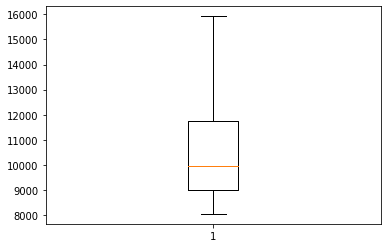

In [37]:
plt.boxplot(generated_distances, showfliers=False)
plt.show()

In [39]:
real_distances = mean_distance_real(real)

In [40]:
real_distances.mean()

6806.727

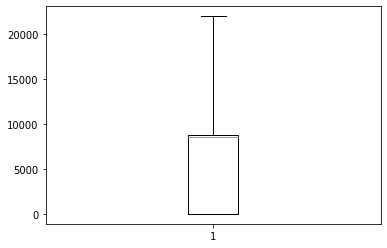

In [43]:
plt.boxplot(real_distances, showfliers=False)
plt.show()

In [45]:
mean_distance_real(generated).mean()

8461.554